In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
url = "https://raw.githubusercontent.com/AmenaNajeeb/Data/master/bigmart_data.csv"
df = pd.read_csv(url)

In [ ]:
del df['Item_Identifier']
del df['Outlet_Identifier']
del df['Item_Weight']
del df['Item_Type']

In [ ]:
df.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df

In [ ]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [ ]:
df.isnull().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df['Item_Visibility'] = 100 * df['Item_Visibility']

In [ ]:
df

In [ ]:
def label_encode(fat_content):
  if(fat_content == "Low Fat" and "LF" and "low fat"):
    label = 0
  else:
    label = 1
  return label
  
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(label_encode)

In [ ]:
def label_encode_1(outlet_size):
  if(outlet_size == "Small"):
    label = 0
  elif(outlet_size == "Medium"):
    label = 1
  else:
    label = 2
  return label
  
df['Outlet_Size'] = df['Outlet_Size'].apply(label_encode_1)

In [ ]:
def label_encode_2(outlet_location):
  if(outlet_location == "Tier 1"):
    label = 1
  elif(outlet_location == "Tier 2"):
    label = 2
  else:
    label = 3
  return label
  
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].apply(label_encode_2)

In [ ]:
def label_encode_3(outlet):
  if(outlet == "Supermarket Type1"):
    label = 1
  elif(outlet == "Supermarket Type2"):
    label = 2
  elif(outlet == "Supermarket Type3"):
    label = 3
  else:
    label = 4
  return label
  
df['Outlet_Type'] = df['Outlet_Type'].apply(label_encode_3)

In [ ]:
df

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,1.604730,249.8092,1999,1,1,1,3735.1380
1,1,1.927822,48.2692,2009,1,3,2,443.4228
2,0,1.676007,141.6180,1999,1,1,1,2097.2700
3,1,0.000000,182.0950,1998,1,3,4,732.3800
4,0,0.000000,53.8614,1987,2,3,1,994.7052
...,...,...,...,...,...,...,...,...
8518,0,5.678339,214.5218,1987,2,3,1,2778.3834
8519,1,4.698243,108.1570,2002,1,2,1,549.2850
8520,0,3.518627,85.1224,2004,0,2,1,1193.1136
8521,1,14.522065,103.1332,2009,1,3,2,1845.5976


<BarContainer object of 9 artists>

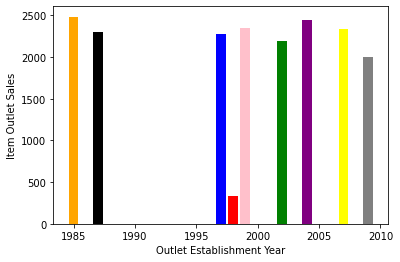

In [ ]:
Item_Outlet_Sales_by_Outlet_Establishment_Year = df.groupby('Outlet_Establishment_Year').Item_Outlet_Sales.mean()
Item_Outlet_Sales_by_Outlet_Establishment_Year.sort_values(inplace=True)
x = Item_Outlet_Sales_by_Outlet_Establishment_Year.index.tolist()
y = Item_Outlet_Sales_by_Outlet_Establishment_Year.values.tolist()
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Item Outlet Sales")
plt.bar(x,y,color=['red','grey','green','blue','black','yellow','pink','purple','orange'])

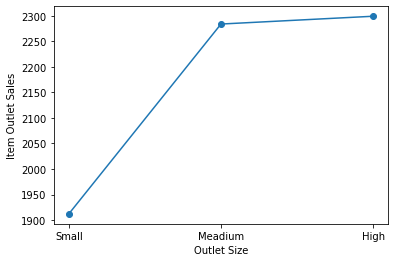

In [ ]:
Item_Outlet_Sales_by_Outlet_Size = df.groupby('Outlet_Size').Item_Outlet_Sales.mean()
Item_Outlet_Sales_by_Outlet_Size.sort_values(inplace=True)
x = Item_Outlet_Sales_by_Outlet_Size.index.tolist()
y = Item_Outlet_Sales_by_Outlet_Size.values.tolist()
plt.xlabel("Outlet Size")
plt.ylabel("Item Outlet Sales")
plt.xticks(ticks = (0,1,2), labels=["Small","Meadium","High"])
plt.plot(x,y,marker='o')

<BarContainer object of 2 artists>

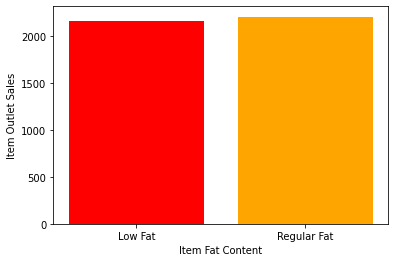

In [ ]:
Item_Outlet_Sales_by_Item_Fat_Content = df.groupby('Item_Fat_Content').Item_Outlet_Sales.mean()
Item_Outlet_Sales_by_Item_Fat_Content.sort_values(inplace=True)
x = Item_Outlet_Sales_by_Item_Fat_Content.index.tolist()
y = Item_Outlet_Sales_by_Item_Fat_Content.values.tolist()
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.xticks(ticks = (0,1), labels=["Low Fat","Regular Fat"])
plt.bar(x,y,color=['red','orange'])

<BarContainer object of 3 artists>

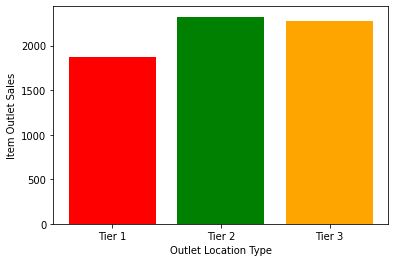

In [ ]:
Item_Outlet_Sales_by_Outlet_Location_Type = df.groupby('Outlet_Location_Type').Item_Outlet_Sales.mean()
Item_Outlet_Sales_by_Outlet_Location_Type.sort_values(inplace=True)
x = Item_Outlet_Sales_by_Outlet_Location_Type.index.tolist()
y = Item_Outlet_Sales_by_Outlet_Location_Type.values.tolist()
plt.xlabel("Outlet Location Type")
plt.ylabel("Item Outlet Sales")
plt.xticks(ticks = (1,2,3), labels=["Tier 1","Tier 2","Tier 3"])
plt.bar(x,y, color=['red','orange',"green"])

<BarContainer object of 4 artists>

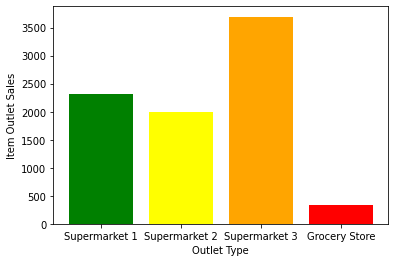

In [ ]:
Item_Outlet_Sales_by_Outlet_Type = df.groupby('Outlet_Type').Item_Outlet_Sales.mean()
Item_Outlet_Sales_by_Outlet_Type.sort_values(inplace=True)
x = Item_Outlet_Sales_by_Outlet_Type.index.tolist()
y = Item_Outlet_Sales_by_Outlet_Type.values.tolist()
plt.xlabel("Outlet Type")
plt.ylabel("Item Outlet Sales")
plt.xticks(ticks = (1,2,3,4), labels=["Supermarket 1","Supermarket 2","Supermarket 3","Grocery Store"])
plt.bar(x,y,color=['red','yellow',"green","orange"])

In [ ]:
x = df.drop(["Item_Outlet_Sales"],axis=1)
y = df["Item_Outlet_Sales"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15, random_state = 100)

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ",model.score(x_test,y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.19393768656208768


In [ ]:
x_test[:10]

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3454,0,16.966714,183.5266,1987,2,3,1
3386,0,3.546967,256.3014,2007,1,2,1
235,0,4.357366,192.8846,1985,1,3,3
7201,0,5.233528,108.1280,2007,1,2,1
7782,1,4.419237,180.3318,1997,0,1,1
3960,0,19.254067,160.2236,1998,1,3,4
2688,0,5.762690,83.3566,1999,1,1,1
1867,0,16.507364,207.7270,1998,1,3,4
6309,0,4.460638,174.2054,1985,1,3,3
4202,0,3.786485,63.0826,1987,2,3,1


In [ ]:
y_pred[:10]

array([5163.9448, 6358.39  , 3163.8816, 1965.4416, 2189.1504,  633.8416,
       1606.5754,  621.1914, 4012.1108, 1661.8368])